In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd


In [15]:
file_path = 'MS_01_T0_TCRB.tsv'
# Read the CSV file
df = pd.read_csv(file_path, sep = "\t")

In [16]:
df = df.dropna(subset=['aminoAcid'])

In [17]:
df.to_csv('MS_wo_na_all.csv', index=False)

In [18]:
y = df[~df['aminoAcid'].astype(str).str.contains(r'\*')]

In [29]:
y = df["aminoAcid"].tolist()

In [31]:
# Apply align_imgt to each sequence and create a DataFrame
aligned_sequences = [align_imgt(seq) for seq in y]
df_aligned = pd.DataFrame(aligned_sequences)
df_aligned

,P104,P105,P106,P107,P108,P109,P110,P111,P111.1,P112.2,P112.1,P112,P113,P114,P115,P116,P117,P118
0,C,A,S,P,M,V,NA,NA,NA,NA,NA,NA,NA,H,G,Y,T,F
1,C,A,S,S,F,G,S,T,NA,NA,Y,S,N,Q,P,Q,H,F
2,C,A,S,S,S,P,P,L,D,S,S,S,I,R,N,T,E,A
3,C,A,S,S,L,A,G,T,NA,NA,NA,P,Y,N,E,Q,F,F
4,C,A,S,S,Q,A,R,G,NA,NA,NA,P,A,T,E,A,F,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17797,C,A,S,S,L,V,T,S,G,R,V,F,G,N,E,Q,F,F
17798,C,A,S,S,F,G,S,NA,NA,NA,NA,NA,Y,N,E,Q,F,F
17799,C,A,S,S,H,G,E,T,NA,NA,NA,S,T,D,T,Q,Y,F
17800,C,A,S,S,Q,E,E,R,G,NA,Y,S,N,Q,P,Q,H,F


In [21]:
all_imgt_pos = [
    "P104", "P105", "P106", "P107", "P108", "P109", "P110", "P111",
    "P111.1", "P112.2", "P112.1", "P112", "P113", "P114", "P115",
    "P116", "P117", "P118"]

# Custom function to align CDR3 AA seq to IMGT
def align_imgt(CDR3):
    # Convert the string to a list of characters
    AA = list(CDR3)

    # Calculate the forward count
    N_AA_fow = len(CDR3) // 2 + len(CDR3) % 2

    # Calculate the number of NA positions
    N_AA_na = 18 - len(CDR3)

    # Adjust the list of characters
    AAmod = (
        AA[:N_AA_fow] +
        ["NA"] * N_AA_na +
        AA[N_AA_fow:]
    )

    # Assign names to the modified list
    AAmod_named = dict(zip(all_imgt_pos, AAmod))

    return AAmod_named

# Example usage
CDR3 = "CASSIRSSYEQYF"
aligned_seq = align_imgt(CDR3)
print(aligned_seq)

{'P104': 'C', 'P105': 'A', 'P106': 'S', 'P107': 'S', 'P108': 'I', 'P109': 'R', 'P110': 'S', 'P111': 'NA', 'P111.1': 'NA', 'P112.2': 'NA', 'P112.1': 'NA', 'P112': 'NA', 'P113': 'S', 'P114': 'Y', 'P115': 'E', 'P116': 'Q', 'P117': 'Y', 'P118': 'F'}


In [32]:
### Removing the first three and the last two columns due to las of information there

In [45]:
df_aligned_middle = df_aligned.iloc[:,3:16]

In [59]:
encodding = {'P': 8, 'C': 19, 'D': 18, 'N': 9, 'Q': 7, 'I': 13, 'S': 5, 'W': 2, 'M': 10, 'G': 15, 'A': 20, 'R': 6, 'F': 16, 'E': 17, 'H': 14, 'T': 4, 'Y': 1, 'V': 3, 'K': 12, 'L': 11, 'NA': 0}


In [65]:
matrix

array([[ 8, 10,  3, ..., 14, 15,  1],
       [ 5, 16, 15, ...,  7,  8,  7],
       [ 5,  5,  8, ...,  6,  9,  4],
       ...,
       [ 5, 14, 15, ..., 18,  4,  7],
       [ 5,  7, 17, ...,  7,  8,  7],
       [ 5, 11, 20, ...,  9, 17,  7]])

In [64]:
df_encodded = df_aligned_middle.replace(encodding)
df_encodded = df_encodded.apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)
matrix = df_encodded.values
np.savetxt("extended_matrix.txt", matrix, fmt='%d', delimiter=' ')

In [66]:
df_encodded.to_csv('encodded_imgt_positions.csv', index=False)

In [4]:
matrix = np.loadtxt('extended_matrix.txt')

In [5]:
matrix

array([[ 8., 10.,  3., ..., 14., 15.,  1.],
       [ 5., 16., 15., ...,  7.,  8.,  7.],
       [ 5.,  5.,  8., ...,  6.,  9.,  4.],
       ...,
       [ 5., 14., 15., ..., 18.,  4.,  7.],
       [ 5.,  7., 17., ...,  7.,  8.,  7.],
       [ 5., 11., 20., ...,  9., 17.,  7.]])

In [6]:
round(len(matrix)*0.8)

14242

In [5]:
training_set_X = matrix[:round(len(matrix)*0.8),:4]
test_set_X = matrix[round(len(matrix)*0.8):,:4]
training_set_y = matrix[:round(len(matrix)*0.8),4]
test_set_y = matrix[round(len(matrix)*0.8):,4]

In [12]:
### Predicting the 4th position of the sequences

In [8]:

print("Input sequences (training_set_X):")
print(training_set_X)
print("\nTarget sequences (training_set_y):")
print(training_set_y)

Input sequences (training_set_X):
[[ 8. 10.  3.  0.]
 [ 5. 16. 15.  5.]
 [ 5.  5.  8.  8.]
 ...
 [ 5.  8.  6. 18.]
 [ 6. 18.  4. 13.]
 [15.  8.  3.  0.]]

Target sequences (training_set_y):
[ 0.  4. 11. ...  0. 11.  0.]


In [28]:

print("Input sequences (test_set_X):")
print(test_set_X)
print("\nTarget sequences (test_set_y):")
print(test_set_y)

Input sequences (test_set_X):
[[ 5.  6.  4. 15.]
 [ 5.  1.  5. 12.]
 [ 5.  8.  3. 15.]
 ...
 [ 5. 14. 15. 17.]
 [ 5.  7. 17. 17.]
 [ 5. 11. 20.  0.]]

Target sequences (test_set_y):
[15.  7.  6. ...  4.  6.  0.]


In [13]:
### Developing the model and increasing accuracy

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Define parameters
vocab_size = 21  # 20 amino acids plus NA
embedding_dim = 8
rnn_units = 32
sequence_length = 4
batch_size = 10  # Use batch size  for prediction later

# Build the model
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=sequence_length),
    #LSTM(rnn_units, return_sequences=True),
    LSTM(rnn_units),
    Dense(vocab_size, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 4, 8)              168       
                                                                 
 lstm_2 (LSTM)               (None, 32)                5248      
                                                                 
 dense_1 (Dense)             (None, 21)                693       
                                                                 
Total params: 6109 (23.86 KB)
Trainable params: 6109 (23.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
training_set_y.shape

(14242,)

In [11]:
# Train the model
history =  model.fit(training_set_X, training_set_y, epochs=10, batch_size = 10)

Epoch 1/10
1425/1425 [==============================] - 5s 4ms/step - loss: 1.6691 - accuracy: 0.5444
Epoch 2/10
1425/1425 [==============================] - 5s 4ms/step - loss: 1.6561 - accuracy: 0.5443
Epoch 3/10
1425/1425 [==============================] - 6s 4ms/step - loss: 1.6364 - accuracy: 0.5442
Epoch 4/10
1425/1425 [==============================] - 5s 3ms/step - loss: 1.6196 - accuracy: 0.5442
Epoch 5/10
1425/1425 [==============================] - 6s 4ms/step - loss: 1.6070 - accuracy: 0.5444
Epoch 6/10
1425/1425 [==============================] - 5s 4ms/step - loss: 1.5969 - accuracy: 0.5431
Epoch 7/10
1425/1425 [==============================] - 6s 4ms/step - loss: 1.5911 - accuracy: 0.5431
Epoch 8/10
1425/1425 [==============================] - 6s 4ms/step - loss: 1.5849 - accuracy: 0.5452
Epoch 9/10
1425/1425 [==============================] - 5s 4ms/step - loss: 1.5807 - accuracy: 0.5446
Epoch 10/10
1425/1425 [==============================] - 7s 5ms/step - loss: 1.575

In [29]:
test_set_X[[0]]

array([[ 5.,  6.,  4., 15.]])

In [38]:
predictions = model.predict(test_set_X[[200]])

# Display the predictions
print("Raw predictions:\n", predictions)


1/1 [==============================] - 0s 30ms/step
Raw predictions:
 [[3.6837456e-01 5.6220358e-03 3.8173953e-03 9.5339594e-03 3.1510841e-02
  1.4117022e-02 4.1606292e-02 1.8525001e-02 1.6794834e-02 3.7266351e-03
  1.9282008e-03 1.4213787e-02 2.7638725e-03 4.5323875e-03 3.2311911e-03
  1.2388185e-01 4.0851906e-03 1.4069413e-02 2.3738807e-02 2.2642396e-04
  2.9370025e-01]]


In [39]:
test_set_y[200]

20.0

In [40]:
# Convert probabilities to class labels
predicted_classes = np.argmax(predictions, axis=-1)

# Display the predicted class labels
print("Predicted class labels:\n", predicted_classes)

Predicted class labels:
 [0]


In [13]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_set_X, test_set_y)


112/112 [==============================] - 1s 2ms/step - loss: 1.9285 - accuracy: 0.3994


In [14]:
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

Test Loss: 1.9285264015197754
Test Accuracy: 0.39943820238113403


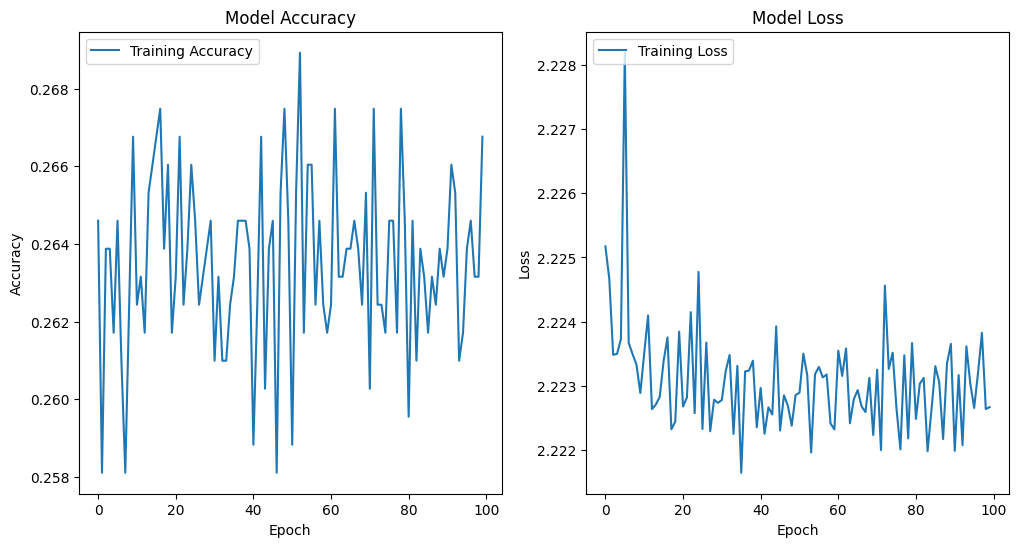

In [135]:
# Plot the training history
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()

In [137]:
training_set_X_2 = amino_acids[:1387,:5]
test_set_X_2 = amino_acids[1388:,:5]
training_set_y_2 = amino_acids[:1387,5]
test_set_y_2 = amino_acids[1388:,5]

In [138]:
# Train the model
history_2 =  model.fit(training_set_X_2, training_set_y_2, epochs=100, batch_size = 1)

Epoch 1/100
1387/1387 [==============================] - 7s 4ms/step - loss: 6.0623 - accuracy: 0.1312
Epoch 2/100
1387/1387 [==============================] - 5s 3ms/step - loss: 4.4131 - accuracy: 0.1759
Epoch 3/100
1387/1387 [==============================] - 5s 4ms/step - loss: 3.8451 - accuracy: 0.1839
Epoch 4/100
1387/1387 [==============================] - 5s 4ms/step - loss: 3.5097 - accuracy: 0.1932
Epoch 5/100
1387/1387 [==============================] - 5s 3ms/step - loss: 3.2597 - accuracy: 0.2141
Epoch 6/100
1387/1387 [==============================] - 6s 4ms/step - loss: 3.0755 - accuracy: 0.2098
Epoch 7/100
1387/1387 [==============================] - 5s 3ms/step - loss: 2.9365 - accuracy: 0.2264
Epoch 8/100
1387/1387 [==============================] - 5s 3ms/step - loss: 2.7902 - accuracy: 0.2502
Epoch 9/100
1387/1387 [==============================] - 6s 4ms/step - loss: 2.7395 - accuracy: 0.2574
Epoch 10/100
1387/1387 [==============================] - 5s 3ms/step - l

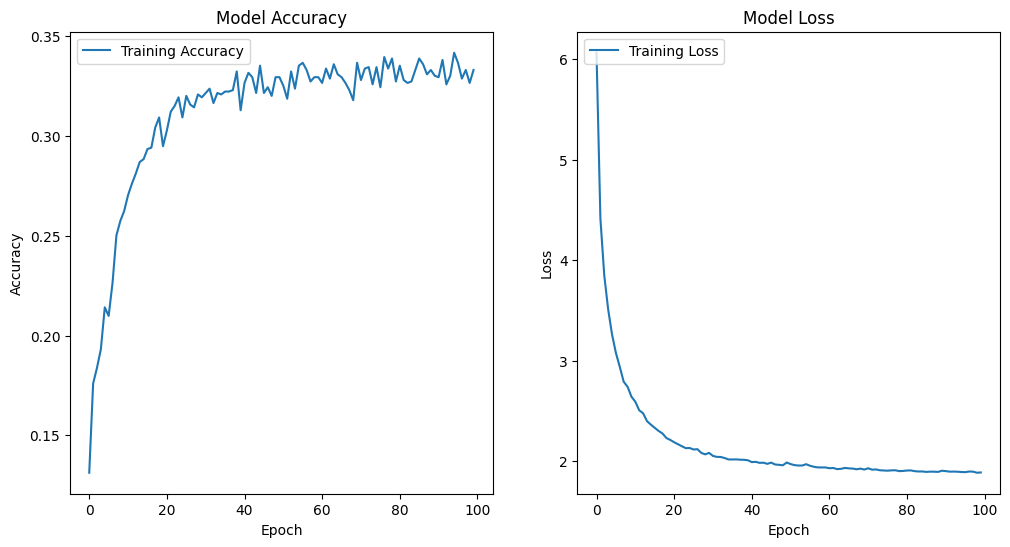

In [139]:
# Plot the training history
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_2.history['loss'], label='Training Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()

Epoch 1/100
1387/1387 [==============================] - 5s 3ms/step - loss: 4.8367 - accuracy: 0.1839
Epoch 2/100
1387/1387 [==============================] - 5s 4ms/step - loss: 3.5181 - accuracy: 0.2660
Epoch 3/100
1387/1387 [==============================] - 6s 4ms/step - loss: 3.0463 - accuracy: 0.3100
Epoch 4/100
1387/1387 [==============================] - 5s 3ms/step - loss: 2.7892 - accuracy: 0.3425
Epoch 5/100
1387/1387 [==============================] - 6s 4ms/step - loss: 2.6368 - accuracy: 0.3396
Epoch 6/100
1387/1387 [==============================] - 5s 3ms/step - loss: 2.4782 - accuracy: 0.3648
Epoch 7/100
1387/1387 [==============================] - 5s 4ms/step - loss: 2.3511 - accuracy: 0.3727
Epoch 8/100
1387/1387 [==============================] - 6s 4ms/step - loss: 2.2420 - accuracy: 0.3850
Epoch 9/100
1387/1387 [==============================] - 5s 3ms/step - loss: 2.1615 - accuracy: 0.4023
Epoch 10/100
1387/1387 [==============================] - 6s 4ms/step - l

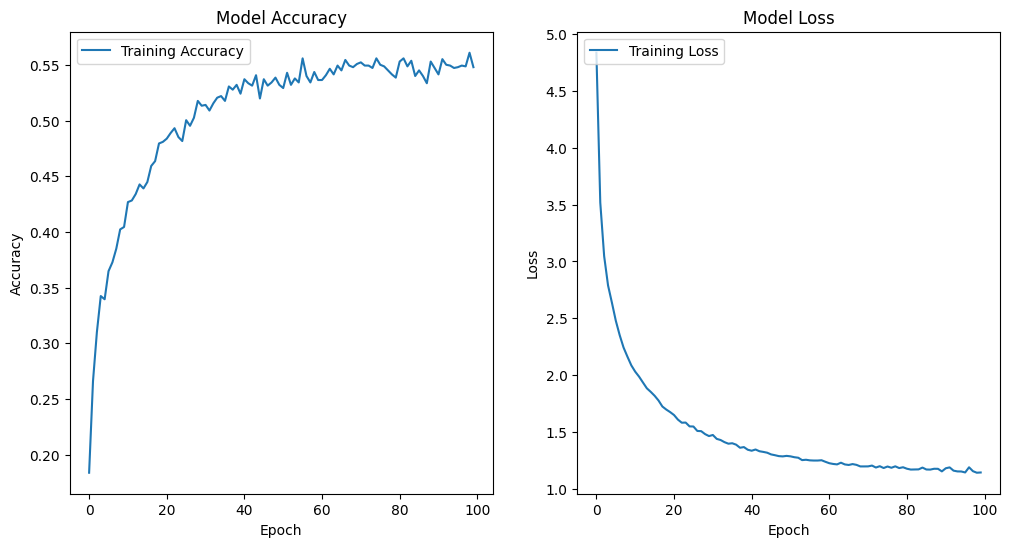

In [140]:
training_set_X_3 = amino_acids[:1387,:6]
test_set_X_3 = amino_acids[1388:,:6]
training_set_y_3 = amino_acids[:1387,6]
test_set_y_3 = amino_acids[1388:,6]
# Train the model
history_3 =  model.fit(training_set_X_3, training_set_y_3, epochs=100, batch_size = 1)

# Plot the training history
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_3.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_3.history['loss'], label='Training Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()